In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from tabulate import tabulate

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Data Analyst - Test Data - US.csv")

In [3]:
df

,Review,date,Location,ID
0,I was very impressed with the resort.\n Great ...,19-Aug,Sebastian,1
1,The rooms were nice the outside needs work als...,19-Aug,Los Angeles,2
2,Great location! I have stayed at this hotel on...,19-Aug,Georgia,3
3,The hotel was adequate for my stay. The strips...,19-Aug,NaN,4
4,"Great location, room was large and spacious. P...",19-Aug,Palm Harbor,5
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",19-Jul,United States of America,6444
6444,·the internet barely worked or didn't work,19-Jul,United States of America,6445
6445,·the location was great.\n \n \n \n \n ·the be...,19-Jul,United States of America,6446
6446,·we were early for check in and the staff was ...,19-Jul,United States of America,6447


In [4]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    reviews = re.sub(r'[^a-zA-Z]', ' ', str(df['Review'][i]))
    reviews = reviews.lower()
    reviews = reviews.split()
    
    reviews= [lemmatizer.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews = ' '.join(reviews)
    corpus.append(reviews)

In [5]:
df['Corpus'] = corpus

In [6]:
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['ID']
    Corpus = row['Corpus']
    res[Review] = sia.polarity_scores(Corpus)

  0%|          | 0/6448 [00:00<?, ?it/s]

In [7]:
vaders = pd.DataFrame(res).T

In [8]:
vaders = vaders.reset_index().rename(columns = {'index':'ID'})

In [9]:
vaders =vaders.merge(df, how = 'left')

In [10]:
date_wise = vaders['date'].value_counts()

In [11]:
date_wise

18-Dec    630
19-Mar    605
19-Apr    593
19-Jul    549
19-May    526
18-Oct    524
18-Nov    519
19-Jan    513
18-Sep    481
18-Aug    438
19-Feb    418
19-Jun    362
19-Aug    290
Name: date, dtype: int64

Text(0.5, 1.0, 'Reviews Posted Monthly')

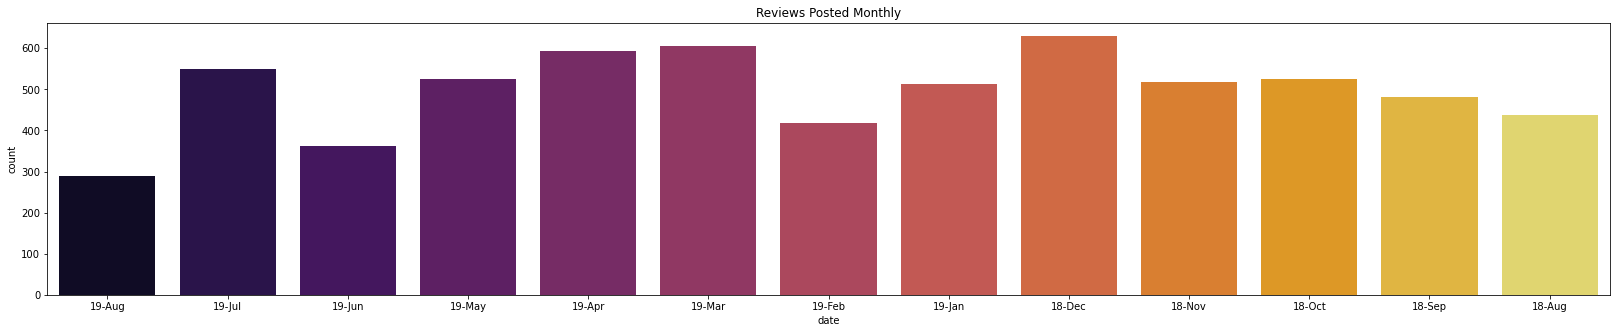

In [12]:
plt.figure(figsize=(28,5))
sns.countplot(x="date", data=vaders,palette='inferno')
plt.rcParams.update({'font.size':10})
plt.xticks(rotation = 0)
plt.title('Reviews Posted Monthly')


In [13]:
vaders.rename(columns = {'neg':'Negative', 'neu':'Neutral', 'pos' : 'Positive'}, inplace = True)

In [14]:
vaders

,ID,Negative,Neutral,Positive,compound,Review,date,Location,Corpus
0,1,0.000,0.500,0.500,0.9325,I was very impressed with the resort.\n Great ...,19-Aug,Sebastian,impressed resort great staff main resort pool ...
1,2,0.000,0.498,0.502,0.8779,The rooms were nice the outside needs work als...,19-Aug,Los Angeles,room nice outside need work also free breakfas...
2,3,0.000,0.728,0.272,0.6249,Great location! I have stayed at this hotel on...,19-Aug,Georgia,great location stayed hotel last three trip ne...
3,4,0.119,0.727,0.154,0.1779,The hotel was adequate for my stay. The strips...,19-Aug,NaN,hotel adequate stay strip bathtub useless fell...
4,5,0.000,0.400,0.600,0.9260,"Great location, room was large and spacious. P...",19-Aug,Palm Harbor,great location room large spacious parking eas...
...,...,...,...,...,...,...,...,...,...
6443,6444,0.000,0.684,0.316,0.9682,"·the staff were all so friendly. frank, the ch...",19-Jul,United States of America,staff friendly frank chef buffet bar top meeti...
6444,6445,0.000,1.000,0.000,0.0000,·the internet barely worked or didn't work,19-Jul,United States of America,internet barely worked work
6445,6446,0.243,0.374,0.383,0.3612,·the location was great.\n \n \n \n \n ·the be...,19-Jul,United States of America,location great bed uncomfortable bed ever
6446,6447,0.000,1.000,0.000,0.0000,·we were early for check in and the staff was ...,19-Jul,United States of America,early check staff accommodating able check sev...


<Figure size 2016x360 with 0 Axes>

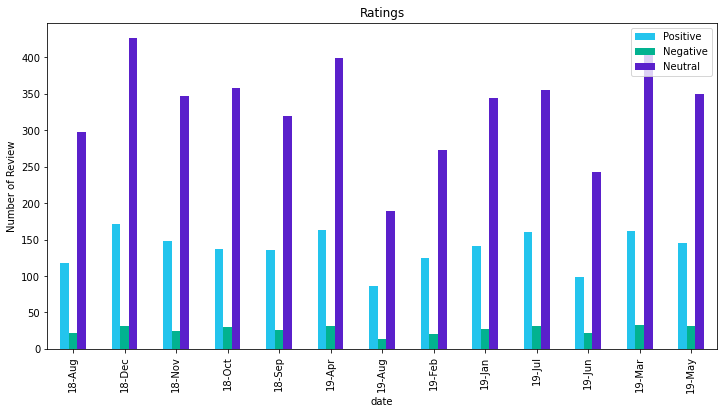

In [15]:
plt.figure(figsize=(28,5))
ax = vaders.groupby('date')[['Positive','Negative','Neutral']].sum().plot.bar(figsize=(12,6),color = ['#23C4ED','#02B290','#5A20CB'])
ax.set_ylabel('Number of Review')
ax.set_title('Ratings')
ax.legend()


In [16]:
from collections import Counter
Most_common_words = Counter(" ".join(vaders['Corpus']).split()).most_common(100)

In [17]:
Most_common_words

[('read', 10632),
 ('le', 5428),
 ('room', 4629),
 ('hotel', 3182),
 ('staff', 1813),
 ('great', 1638),
 ('location', 1395),
 ('clean', 1367),
 ('stay', 1328),
 ('nice', 1255),
 ('good', 977),
 ('time', 939),
 ('bed', 843),
 ('friendly', 794),
 ('night', 788),
 ('would', 766),
 ('check', 734),
 ('service', 727),
 ('pool', 706),
 ('u', 622),
 ('day', 616),
 ('like', 610),
 ('one', 601),
 ('parking', 589),
 ('small', 571),
 ('desk', 569),
 ('property', 539),
 ('front', 534),
 ('get', 532),
 ('close', 530),
 ('disney', 527),
 ('place', 526),
 ('stayed', 510),
 ('restaurant', 509),
 ('new', 502),
 ('bathroom', 490),
 ('helpful', 485),
 ('comfortable', 480),
 ('area', 473),
 ('resort', 455),
 ('need', 452),
 ('could', 452),
 ('breakfast', 431),
 ('also', 423),
 ('everything', 409),
 ('back', 405),
 ('really', 389),
 ('park', 375),
 ('well', 363),
 ('de', 358),
 ('price', 354),
 ('floor', 353),
 ('door', 351),
 ('lobby', 345),
 ('view', 341),
 ('shower', 336),
 ('old', 335),
 ('fee', 331),
 

In [18]:
d = pd.DataFrame(Most_common_words,columns=['Words','Count'])

In [19]:
d

,Words,Count
0,read,10632
1,le,5428
2,room,4629
3,hotel,3182
4,staff,1813
...,...,...
95,right,225
96,n,221
97,experience,221
98,made,220


In [20]:
text = " ".join(Word.split()[0] for Word in d.Words)

In [21]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

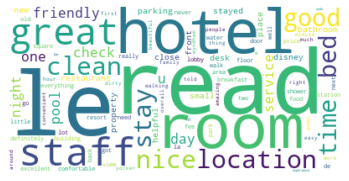

<Figure size 1440x720 with 0 Axes>

In [22]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[20,10])
plt.show()

In [23]:
Positive_Review = round(vaders['Positive'].sum())

In [24]:
Negative_Review = round(vaders['Negative'].sum())

In [25]:
Neutral_Review = round(vaders['Neutral'].sum())

In [26]:
Total_Review = vaders['ID'].count()

In [27]:
Positive_Review

1791

In [28]:
Negative_Review

344

In [29]:
Neutral_Review

4312

In [30]:
Total_Review

6448

In [32]:
Positive_Review*100/Total_Review

27.77605459057072

In [33]:
Negative_Review*100/Total_Review

5.33498759305211

In [34]:
Neutral_Review*100/Total_Review

66.87344913151365

In [35]:
data = [['Positive_Review', 1791, 27.77605459057072] , ['Negative_Review' , 344, 5.33498759305211] , ['Neutral_Review' , 4312, 66.87344913151365]]
head = ['Sentiment', 'Count', 'Percentage']


print("*** Reviews According to Percentage ***")
t = tabulate(data, headers=head, tablefmt="grid")
print(t)

*** Reviews According to Percentage ***
+-----------------+---------+--------------+
| Sentiment       |   Count |   Percentage |
+=================+=========+==============+
| Positive_Review |    1791 |     27.7761  |
+-----------------+---------+--------------+
| Negative_Review |     344 |      5.33499 |
+-----------------+---------+--------------+
| Neutral_Review  |    4312 |     66.8734  |
+-----------------+---------+--------------+


In [36]:
v = vaders['Location'].value_counts().head(5)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


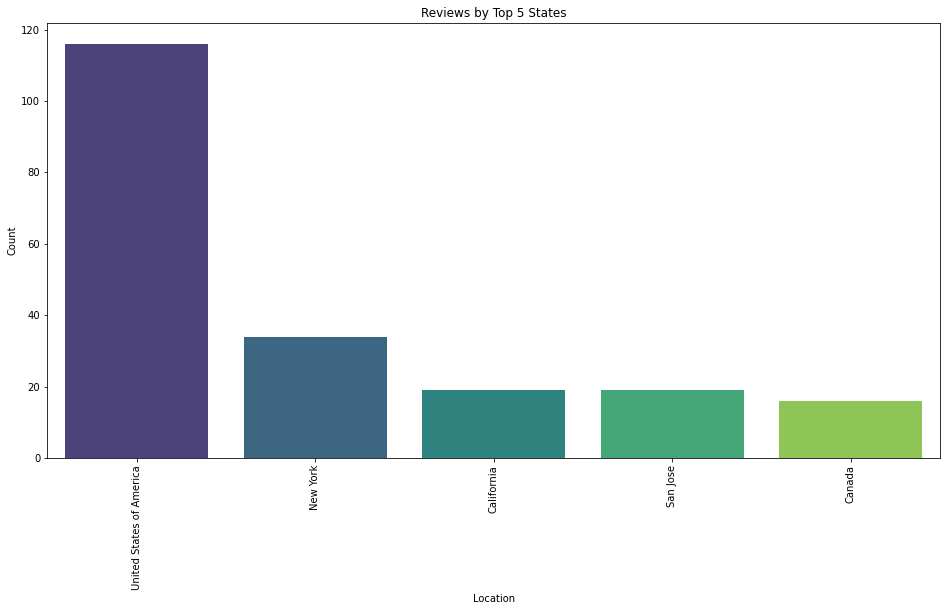

In [37]:
plt.figure(figsize = (16,8))
sns.barplot(v[:5].index,v[:5],palette = 'viridis')
plt.title('Reviews by Top 5 States')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()